In [ ]:
# 30个频率频道 116*116输入   3种不同3dcnn模型的对比  

In [ ]:
# !pip install import-ipynb
# import import_ipynb

%tensorflow_version 1.x
# !pip install numpy==1.16.1

TensorFlow 1.x selected.


# 初始化

In [1]:

import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.metrics import r2_score, accuracy_score
import matplotlib.pyplot as plt 
from keras.models import Model, Sequential
from keras.layers import Conv1D,Flatten,Conv2D, Dropout, MaxPooling2D, Input,Conv3D, MaxPooling3D, Dense, BatchNormalization, AveragePooling3D
from keras import Input,layers
from keras.layers.merge import concatenate 
from google.colab import drive
from keras.optimizers import Adam,RMSprop,SGD
from keras.wrappers.scikit_learn import KerasClassifier,KerasRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
drive.mount('/content/drive')
# %cp -av fromfolder tofolder
# %cd "/content/drive/My Drive/Newdata/"
# from model_functions import *

Using TensorFlow backend.


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# 载入数据

In [ ]:
train_data = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_30_116_116.npy')
train_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_4_3.npy')
test_data =  np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_30_116_116.npy')
test_label = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_4_3.npy')

train_data = np.reshape(train_data,(2700,30,116,116,1))
test_data = np.reshape(test_data,(900,30,116,116,1)) 

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

(2700, 30, 116, 116, 1)
(2700, 4, 3)
(900, 30, 116, 116, 1)
(900, 4, 3)


# nonflipped全保留数据 不带control(150)  两个class

In [2]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(150,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(150,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(150,30,116,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_150_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(150,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(2700,30,116,116,1))
test_data = np.reshape(test_data,(900,30,116,116,1)) 

train_data, train_label = shuffle(train_data,train_label, random_state =10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116, 116)
(2700, 4)
(900, 30, 116, 116)
(900, 4)
(2700, 30, 116, 116, 1)
(2700, 4)
(900, 30, 116, 116, 1)
(900, 4)


# nonflipped keep30 不带control（150）两个class

In [2]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(150,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(150,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(150,30,116,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_150_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(150,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_150_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(2700,30,116,116,1))
test_data = np.reshape(test_data,(900,30,116,116,1)) 

# train_data, train_label = shuffle(train_data,train_label, random_state =10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(2700, 30, 116, 116)
(2700, 4)
(900, 30, 116, 116)
(900, 4)
(2700, 30, 116, 116, 1)
(2700, 4)
(900, 30, 116, 116, 1)
(900, 4)


# nonflipped保留30%数据 带control(200) 两个class epoch50: 

In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(200,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(200,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(200,30,116,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_keep30_200_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(200,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(3600,30,116,116,1))
test_data = np.reshape(test_data,(1200,30,116,116,1)) 

train_data, train_label = shuffle(train_data,train_label, random_state =10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

range(1, 25)
[6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]
(3600, 30, 116, 116)
(3600, 4)
(1200, 30, 116, 116)
(1200, 4)
(3600, 30, 116, 116, 1)
(3600, 4)
(1200, 30, 116, 116, 1)
(1200, 4)


# nonflipped全保留数据 带control(200) 两个class epoch50: 

In [ ]:
patient_order = range(1,25)
order = shuffle(patient_order, random_state = 10)
print(patient_order)
print(order)  
# [14, 18, 20, 5, 2, 22, 19, 15, 23, 17, 24, 13, 11, 6, 9, 7, 1, 3, 8, 12, 21, 10, 16, 4]    random_state =20 
# [6, 2, 8, 3, 12, 13, 22, 14, 15, 4, 23, 7, 19, 11, 21, 24, 9, 20, 17, 18, 1, 16, 5, 10]    random_state =10

tmp = order[0]
A = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(tmp)+ '.npy',allow_pickle=True)
A = np.reshape(A,(200,30,116,116))
for i in order[1:18]: 
  a = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(i)+ '.npy',allow_pickle=True)
  a = np.reshape(a,(200,30,116,116))
  A = np.concatenate((A,a), axis = 0)
print(A.shape)
# 前十八个 病人数据做训练data(2700, 30, 116,116)


tmp = order[0]
B = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[1:18]: 
  b = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  B = np.concatenate((B,b), axis = 0)
print(B.shape)
# 前十八个 病人数据做训练label(2700, 4)

tmp = order[18]
C = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(tmp)+ '.npy',allow_pickle=True)
C = np.reshape(C,(200,30,116,116))
for i in order[19:]: 
  c = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/connectivity/nonflipped_all_200_' + str(i)+ '.npy',allow_pickle=True)
  c = np.reshape(c,(200,30,116,116))
  C = np.concatenate((C,c), axis = 0)
print(C.shape)
# 后六个人 病人数据做测试data(900, 30, 116,116)

tmp = order[18]
D = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(tmp)+ '.npy',allow_pickle=True)
for i in order[19:]: 
  d = np.load('/content/drive/My Drive/Newdata/ordered_by_patient/4/output_200_4_' + str(i)+ '.npy',allow_pickle=True)
  D = np.concatenate((D,d), axis = 0)
print(D.shape)
# 后六个人 病人数据做测试label(900, 4)

# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_data_2700_6_116_116_original', A)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/train_label_2700_25_3', B)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_data_900_6_116_116_original', C)
# np.save('/content/drive/My Drive/Newdata/ordered_by_patient/test_label_900_25_3', D)

train_data = A
train_label = B
test_data = C
test_label = D

train_data = np.reshape(train_data,(3600,30,116,116,1))
test_data = np.reshape(test_data,(1200,30,116,116,1)) 

# train_data, train_label = shuffle(train_data,train_label, random_state =10)

print(train_data.shape)
print(train_label.shape)
print(test_data.shape)
print(test_label.shape)

# nonflipped 全保留数据 不带control(150)  6hz

In [3]:
def thirtyhz_to_6(Input1,num): #Input1是输入数据，num是样本数量

  Delta = ((Input1[:,0] + Input1[:,1] + Input1[:,2])/3).reshape(num,1,116,116,1)
  Ceta = ((Input1[:,3] + Input1[:,4] + Input1[:,5] + Input1[:,6])/4).reshape(num,1,116,116,1)
  Lowalfa = ((Input1[:,7] + Input1[:,8] + Input1[:,9])/3).reshape(num,1,116,116,1)
  Highalfa = ((Input1[:,10] + Input1[:,11])/2).reshape(num,1,116,116,1)
  Beta1 =((Input1[:,12] + Input1[:,13] + Input1[:,14] + Input1[:,15] + Input1[:,16] + Input1[:,17] + Input1[:,18] + Input1[:,19] + Input1[:,20])/9).reshape(num,1,116,116,1)
  Beta2 =((Input1[:,21] + Input1[:,22] + Input1[:,23] + Input1[:,24] + Input1[:,25] + Input1[:,26] + Input1[:,27] + Input1[:,28] + Input1[:,29])/9).reshape(num,1,116,116,1)
  New = np.concatenate((Delta,Ceta,Lowalfa,Highalfa,Beta1,Beta2), axis = 1)

  return New

train_data = thirtyhz_to_6(train_data,2700)
print(train_data.shape)

test_data = thirtyhz_to_6(test_data,900)
print(test_data.shape)

train_data, train_label = shuffle(train_data,train_label, random_state =20)

(2700, 6, 116, 116, 1)
(900, 6, 116, 116, 1)


# 模型函数30hz


In [3]:
#He正态分布初始化方法，参数由0均值，标准差为sqrt(2 / fan_in) 的正态分布产生，其中fan_in权重张量的扇入
def Functional_model():  
   # This returns a tensor# a layer instance is callable on a tensor, and returns a tensor
  x_input = Input(shape=(30,116,116, 1))
  x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x_input) 
  x = layers.MaxPooling3D(pool_size=(2, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.AveragePooling3D(pool_size=(2, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.AveragePooling3D(pool_size=(2, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  # x = layers.Conv3D(3, kernel_size=(4, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  # # x = layers.AveragePooling3D(pool_size=(3, 3, 3))(x)
  # x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  x = layers.Flatten()(x)
  x = layers.Dense(1024, activation='relu', kernel_initializer='lecun_uniform')(x) 
  x = layers.Dense(512, activation='relu', kernel_initializer='lecun_uniform')(x) 
  # x = layers.Dense(8, activation='relu', kernel_initializer='lecun_uniform')(x) 
  
  y = layers.Dense(4, activation='sigmoid', name = 'y')(x)
  # y2 = layers.Dense(3, activation='softmax', name = 'y2')(x)
  # y3 = layers.Dense(3, activation='softmax', name = 'y3')(x)
  # y4 = layers.Dense(3, activation='softmax', name = 'y4')(x)
  # y5 = layers.Dense(3, activation='softmax', name = 'y5')(x)
  # y6 = layers.Dense(3, activation='softmax', name = 'y6')(x)
  # y7 = layers.Dense(3, activation='softmax', name = 'y7')(x)
  # y8 = layers.Dense(3, activation='softmax', name = 'y8')(x)
  # y9 = layers.Dense(3, activation='softmax', name = 'y9')(x)
  # y10 = layers.Dense(3, activation='softmax', name = 'y10')(x)
  # y11 = layers.Dense(3, activation='softmax', name = 'y11')(x)
  # y12 = layers.Dense(3, activation='softmax', name = 'y12')(x)
  # y13 = layers.Dense(3, activation='softmax', name = 'y13')(x)
  # y14 = layers.Dense(3, activation='softmax', name = 'y14')(x)
  # y15 = layers.Dense(3, activation='softmax', name = 'y15')(x)
  # y16 = layers.Dense(3, activation='softmax', name = 'y16')(x) 
  # y17 = layers.Dense(3, activation='softmax', name = 'y17')(x)
  # y18 = layers.Dense(3, activation='softmax', name = 'y18')(x)
  # y19 = layers.Dense(3, activation='softmax', name = 'y19')(x)
  # y20 = layers.Dense(3, activation='softmax', name = 'y20')(x)
  # y21 = layers.Dense(3, activation='softmax', name = 'y21')(x)
  # y22 = layers.Dense(3, activation='softmax', name = 'y22')(x)
  # y23 = layers.Dense(3, activation='softmax', name = 'y23')(x)
  # y24 = layers.Dense(3, activation='softmax', name = 'y24')(x)   
  # y25 = layers.Dense(3, activation='softmax', name = 'y25')(x)   

  # This creates a model that includes
  model = Model(inputs=x_input, outputs=y
                                        #  ,y2,y3,y4
                                        #  ,y5,y6,y7,y8,y9,y10,y11,y12,y13,y14,y15,y16
                                        #  ,y17,y18,y19,y20,y21,y22,y23,y24,y25
                                         )
  model.summary() 
  model.compile(optimizer = Adam(lr=0.003),
                loss=['binary_crossentropy'
                # ,'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'
                # ,'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy'
                # ,'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy','categorical_crossentropy','categorical_crossentropy','categorical_crossentropy',
                # 'categorical_crossentropy'
                ],
                metrics=['accuracy'])
  return model 

# 模型函数6hz

In [9]:
#He正态分布初始化方法，参数由0均值，标准差为sqrt(2 / fan_in) 的正态分布产生，其中fan_in权重张量的扇入
def Functional_model():  
   # This returns a tensor# a layer instance is callable on a tensor, and returns a tensor
  x_input = Input(shape=(6,116,116, 1))
  x = layers.Conv3D(3, kernel_size=(2, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x_input) 
  x = layers.MaxPooling3D(pool_size=(1, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  # x= layers.Dropout(0.6)(x)
  x = layers.Conv3D(3, kernel_size=(2, 4, 4), activation='relu', kernel_initializer='lecun_uniform')(x)
  x = layers.AveragePooling3D(pool_size=(1, 2, 2))(x)
  x = layers.BatchNormalization()(x)
  x = layers.Flatten()(x)
  # x = layers.Dense(1024, activation='relu', kernel_initializer='lecun_uniform')(x) 
  # x = layers.Dense(512, activation='relu', kernel_initializer='lecun_uniform')(x) 
  # x = layers.Dense(8, activation='relu', kernel_initializer='lecun_uniform')(x) 
  
  y = layers.Dense(4, activation='sigmoid', name = 'y')(x)
  # This creates a model that includes
  model = Model(inputs=x_input, outputs=y)

  model.summary() 
  model.compile(optimizer = Adam(lr=0.0001),
                loss=['binary_crossentropy'],
                metrics=['accuracy'])
  return model 

# 跑模型

In [10]:

num_epochs = 50
batchsize = 30
model = Functional_model()
history = model.fit(train_data, train_label, epochs=num_epochs, batch_size=batchsize, verbose=1)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 6, 116, 116, 1)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 5, 113, 113, 3)    99        
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 5, 56, 56, 3)      0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 5, 56, 56, 3)      12        
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 4, 53, 53, 3)      291       
_________________________________________________________________
average_pooling3d_2 (Average (None, 4, 26, 26, 3)      0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 4, 26, 26, 3)      12  

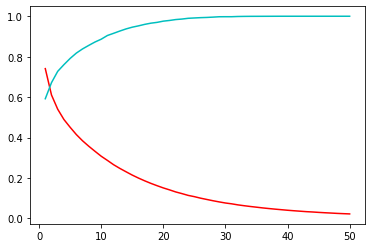

In [11]:
loss = history.history['loss']
accuracy = history.history['accuracy']
# mae_history = history.history['y3_accuracy']

epochs = range(1,len(loss) +1)
plt.plot(epochs, loss, 'r', label='loss')
plt.plot(epochs, accuracy, 'c', label='accuracy')
# plt.plot(epochs, mae_history, 'm', label='mae')

# plt.savefig('/content/drive/My Drive/original4800_50epo_mse_mae1.png' ,dpi=1200)

# 测试结果

In [12]:
tm = model.predict(test_data)   #预测测试集label

num = 900
for i in range(num): #将测试集预测label转化为0,1
  for j in range(4):
    if tm[i,j]>= 0.5:
      tm[i,j] = 1
    if tm[i,j]<0.5:
      tm[i,j] = 0
print(tm[145:155])

Test_label = np.zeros((num,4))  #将测试集真实label放进array
for i in range(num):
  for j in range(4):
    Test_label[i,j] = test_label[i,j]


[[0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 0. 1. 1.]
 [0. 1. 1. 1.]
 [1. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 1.]
 [0. 1. 1. 0.]
 [0. 1. 0. 1.]
 [0. 1. 0. 0.]]


In [13]:

ttt = accuracy_score(Test_label.reshape([num*4]),tm.reshape([num*4]))
print(ttt)


0.43472222222222223


In [ ]:
test = model.evaluate(test_data, [test_label[:,0],test_label[:,1],test_label[:,2],test_label[:,3]
                                  # ,test_label[:,4] ,test_label[:,5],test_label[:,6],test_label[:,7],
                                #  test_label[:,8],test_label[:,9],test_label[:,10],test_label[:,11],test_label[:,12],test_label[:,13],test_label[:,14],test_label[:,15]
                                #   ,test_label[:,16],test_label[:,17],test_label[:,18],test_label[:,19],test_label[:,20],test_label[:,21],test_label[:,22],test_label[:,23],
                                #  test_label[:,24]
                                  ], verbose=0)
# print(test)
average = 5
mean = np.mean(test[average:])
print(len(test[average:]))

print(mean)

4
0.4125000014901161


In [ ]:
model.predict(test_data[899:900])

[array([[1.0000000e+00, 2.8864263e-25, 2.0647243e-11]], dtype=float32),
 array([[1.9982869e-17, 3.2378728e-20, 1.0000000e+00]], dtype=float32),
 array([[1.0000000e+00, 8.8592655e-10, 3.5325257e-10]], dtype=float32),
 array([[4.779138e-08, 8.480343e-18, 1.000000e+00]], dtype=float32)]

In [ ]:
print(test_label[899:900])

[[[0 0 1]
  [1 0 0]
  [0 0 1]
  [1 0 0]]]
